In [687]:
import pandas as pd
import numpy as np
import string
import nltk
import seaborn as sns
%matplotlib inline
import sklearn
import regex as re
import re
import altair as alt
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import time
from termcolor import colored
stop_words = set(stopwords.words('english'))
import matplotlib as plty
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, Embedding, GRU, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM
pd.set_option('display.max_colwidth', None)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [688]:
df = pd.read_csv("/content/Sheet_1.csv")

In [689]:
df.head()

,response_id,class,response_text,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,response_1,not_flagged,I try and avoid this sort of conflict,NaN,NaN,NaN,NaN,NaN
1,response_2,flagged,Had a friend open up to me about his mental addiction to weed and how it was taking over his life and making him depressed,NaN,NaN,NaN,NaN,NaN
2,response_3,flagged,"I saved a girl from suicide once. She was going to swallow a bunch of pills and I talked her out of it in a very calm, loving way.",NaN,NaN,NaN,NaN,NaN
3,response_4,not_flagged,i cant think of one really...i think i may have indirectly,NaN,NaN,NaN,NaN,NaN
4,response_5,not_flagged,"Only really one friend who doesn't fit into the any of the above categories. Her therapist calls it spiraling."" Anyway she pretty much calls me any time she is frustrated by something with her boyfriend to ask me if it's logical or not. Before they would just fight and he would call her crazy. Now she asks me if it's ok he didn't say ""please"" when he said ""hand me the remote.""",,NaN,NaN,NaN,NaN


In [690]:
print("\nInformation about the dataset :")
print(df.info())


Information about the dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   response_id    80 non-null     object 
 1   class          80 non-null     object 
 2   response_text  80 non-null     object 
 3   Unnamed: 3     2 non-null      object 
 4   Unnamed: 4     0 non-null      float64
 5   Unnamed: 5     1 non-null      object 
 6   Unnamed: 6     0 non-null      float64
 7   Unnamed: 7     1 non-null      object 
dtypes: float64(2), object(6)
memory usage: 5.1+ KB
None


In [691]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

response_id       0
class             0
response_text     0
Unnamed: 3       78
Unnamed: 4       80
Unnamed: 5       79
Unnamed: 6       80
Unnamed: 7       79
dtype: int64


In [692]:
df.dropna(inplace=True, axis=1 )
df.head()

,response_id,class,response_text
0,response_1,not_flagged,I try and avoid this sort of conflict
1,response_2,flagged,Had a friend open up to me about his mental addiction to weed and how it was taking over his life and making him depressed
2,response_3,flagged,"I saved a girl from suicide once. She was going to swallow a bunch of pills and I talked her out of it in a very calm, loving way."
3,response_4,not_flagged,i cant think of one really...i think i may have indirectly
4,response_5,not_flagged,"Only really one friend who doesn't fit into the any of the above categories. Her therapist calls it spiraling."" Anyway she pretty much calls me any time she is frustrated by something with her boyfriend to ask me if it's logical or not. Before they would just fight and he would call her crazy. Now she asks me if it's ok he didn't say ""please"" when he said ""hand me the remote."""


In [693]:
missing_values = df.isnull().sum()
print(missing_values)

response_id      0
class            0
response_text    0
dtype: int64


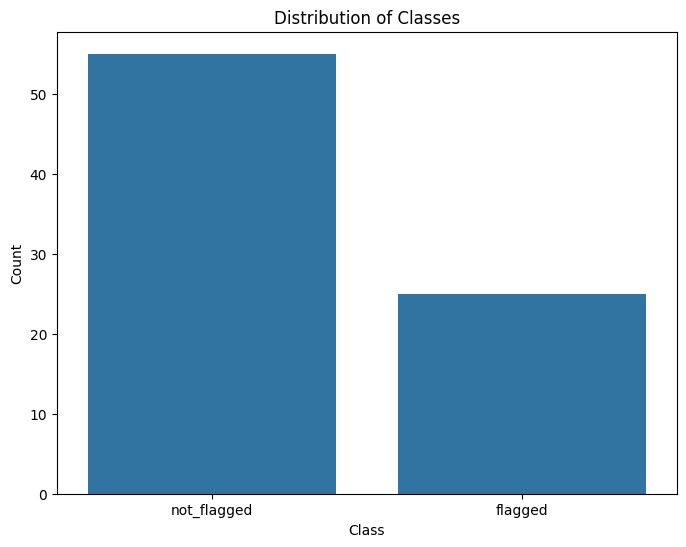

In [694]:
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df)
plt.title("Distribution of Classes")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [695]:
def tokenize_text(df, input_col='response_text', output_col="word_list"):

    # Tokenize the text in the specified column and store it in a new column
    df.loc[:, output_col] = df.loc[:, input_col].apply(lambda t: word_tokenize(t))
    return df
df = tokenize_text(df)
df.head()

,response_id,class,response_text,word_list
0,response_1,not_flagged,I try and avoid this sort of conflict,"[I, try, and, avoid, this, sort, of, conflict]"
1,response_2,flagged,Had a friend open up to me about his mental addiction to weed and how it was taking over his life and making him depressed,"[Had, a, friend, open, up, to, me, about, his, mental, addiction, to, weed, and, how, it, was, taking, over, his, life, and, making, him, depressed]"
2,response_3,flagged,"I saved a girl from suicide once. She was going to swallow a bunch of pills and I talked her out of it in a very calm, loving way.","[I, saved, a, girl, from, suicide, once, ., She, was, going, to, swallow, a, bunch, of, pills, and, I, talked, her, out, of, it, in, a, very, calm, ,, loving, way, .]"
3,response_4,not_flagged,i cant think of one really...i think i may have indirectly,"[i, cant, think, of, one, really, ..., i, think, i, may, have, indirectly]"
4,response_5,not_flagged,"Only really one friend who doesn't fit into the any of the above categories. Her therapist calls it spiraling."" Anyway she pretty much calls me any time she is frustrated by something with her boyfriend to ask me if it's logical or not. Before they would just fight and he would call her crazy. Now she asks me if it's ok he didn't say ""please"" when he said ""hand me the remote.""","[Only, really, one, friend, who, does, n't, fit, into, the, any, of, the, above, categories, ., Her, therapist, calls, it, spiraling, ., '', Anyway, she, pretty, much, calls, me, any, time, she, is, frustrated, by, something, with, her, boyfriend, to, ask, me, if, it, 's, logical, or, not, ., Before, they, would, just, fight, and, he, would, call, her, crazy, ., Now, she, asks, me, if, it, 's, ok, he, did, n't, say, ``, please, '', when, he, said, ``, hand, me, the, remote, ., '']"


In [696]:
def remove_stopwords(list_of_words):
    filtered_list = [w for w in list_of_words if not w.lower() in stop_words]
    return filtered_list
def check_punct(list_of_words):
    filtered_list = [word for word in list_of_words if not re.findall(r"[()!><.,`?']", word)]
    return filtered_list
def clean(df, input_col='word_list', output_col="cleaned_word_list"):
    texts = df.loc[:, input_col]
    word_list = []

    for text in texts:
        t = remove_stopwords(text)
        t = check_punct(t)
        word_list.append(t)

    df.loc[:, output_col] = word_list

    return df

df = clean(df)
df.head()

,response_id,class,response_text,word_list,cleaned_word_list
0,response_1,not_flagged,I try and avoid this sort of conflict,"[I, try, and, avoid, this, sort, of, conflict]","[try, avoid, sort, conflict]"
1,response_2,flagged,Had a friend open up to me about his mental addiction to weed and how it was taking over his life and making him depressed,"[Had, a, friend, open, up, to, me, about, his, mental, addiction, to, weed, and, how, it, was, taking, over, his, life, and, making, him, depressed]","[friend, open, mental, addiction, weed, taking, life, making, depressed]"
2,response_3,flagged,"I saved a girl from suicide once. She was going to swallow a bunch of pills and I talked her out of it in a very calm, loving way.","[I, saved, a, girl, from, suicide, once, ., She, was, going, to, swallow, a, bunch, of, pills, and, I, talked, her, out, of, it, in, a, very, calm, ,, loving, way, .]","[saved, girl, suicide, going, swallow, bunch, pills, talked, calm, loving, way]"
3,response_4,not_flagged,i cant think of one really...i think i may have indirectly,"[i, cant, think, of, one, really, ..., i, think, i, may, have, indirectly]","[cant, think, one, really, think, may, indirectly]"
4,response_5,not_flagged,"Only really one friend who doesn't fit into the any of the above categories. Her therapist calls it spiraling."" Anyway she pretty much calls me any time she is frustrated by something with her boyfriend to ask me if it's logical or not. Before they would just fight and he would call her crazy. Now she asks me if it's ok he didn't say ""please"" when he said ""hand me the remote.""","[Only, really, one, friend, who, does, n't, fit, into, the, any, of, the, above, categories, ., Her, therapist, calls, it, spiraling, ., '', Anyway, she, pretty, much, calls, me, any, time, she, is, frustrated, by, something, with, her, boyfriend, to, ask, me, if, it, 's, logical, or, not, ., Before, they, would, just, fight, and, he, would, call, her, crazy, ., Now, she, asks, me, if, it, 's, ok, he, did, n't, say, ``, please, '', when, he, said, ``, hand, me, the, remote, ., '']","[really, one, friend, fit, categories, therapist, calls, spiraling, Anyway, pretty, much, calls, time, frustrated, something, boyfriend, ask, logical, would, fight, would, call, crazy, asks, ok, say, please, said, hand, remote]"


In [697]:
def try_this(t):

    return word_tokenize(t)
df['tokenization_test'] = df['response_text'].apply(try_this)
df[['response_text', 'tokenization_test']].head()

,response_text,tokenization_test
0,I try and avoid this sort of conflict,"[I, try, and, avoid, this, sort, of, conflict]"
1,Had a friend open up to me about his mental addiction to weed and how it was taking over his life and making him depressed,"[Had, a, friend, open, up, to, me, about, his, mental, addiction, to, weed, and, how, it, was, taking, over, his, life, and, making, him, depressed]"
2,"I saved a girl from suicide once. She was going to swallow a bunch of pills and I talked her out of it in a very calm, loving way.","[I, saved, a, girl, from, suicide, once, ., She, was, going, to, swallow, a, bunch, of, pills, and, I, talked, her, out, of, it, in, a, very, calm, ,, loving, way, .]"
3,i cant think of one really...i think i may have indirectly,"[i, cant, think, of, one, really, ..., i, think, i, may, have, indirectly]"
4,"Only really one friend who doesn't fit into the any of the above categories. Her therapist calls it spiraling."" Anyway she pretty much calls me any time she is frustrated by something with her boyfriend to ask me if it's logical or not. Before they would just fight and he would call her crazy. Now she asks me if it's ok he didn't say ""please"" when he said ""hand me the remote.""","[Only, really, one, friend, who, does, n't, fit, into, the, any, of, the, above, categories, ., Her, therapist, calls, it, spiraling, ., '', Anyway, she, pretty, much, calls, me, any, time, she, is, frustrated, by, something, with, her, boyfriend, to, ask, me, if, it, 's, logical, or, not, ., Before, they, would, just, fight, and, he, would, call, her, crazy, ., Now, she, asks, me, if, it, 's, ok, he, did, n't, say, ``, please, '', when, he, said, ``, hand, me, the, remote, ., '']"


In [698]:
def join_tokens(df, tokens_arrays_col):
    return [" ".join(df.loc[i, tokens_arrays_col]) for i in range(len(df))]
df.loc[:, 'cleaned_text'] = join_tokens(df, 'cleaned_word_list')
df[['response_text', 'cleaned_word_list', 'cleaned_text']].head(6)

,response_text,cleaned_word_list,cleaned_text
0,I try and avoid this sort of conflict,"[try, avoid, sort, conflict]",try avoid sort conflict
1,Had a friend open up to me about his mental addiction to weed and how it was taking over his life and making him depressed,"[friend, open, mental, addiction, weed, taking, life, making, depressed]",friend open mental addiction weed taking life making depressed
2,"I saved a girl from suicide once. She was going to swallow a bunch of pills and I talked her out of it in a very calm, loving way.","[saved, girl, suicide, going, swallow, bunch, pills, talked, calm, loving, way]",saved girl suicide going swallow bunch pills talked calm loving way
3,i cant think of one really...i think i may have indirectly,"[cant, think, one, really, think, may, indirectly]",cant think one really think may indirectly
4,"Only really one friend who doesn't fit into the any of the above categories. Her therapist calls it spiraling."" Anyway she pretty much calls me any time she is frustrated by something with her boyfriend to ask me if it's logical or not. Before they would just fight and he would call her crazy. Now she asks me if it's ok he didn't say ""please"" when he said ""hand me the remote.""","[really, one, friend, fit, categories, therapist, calls, spiraling, Anyway, pretty, much, calls, time, frustrated, something, boyfriend, ask, logical, would, fight, would, call, crazy, asks, ok, say, please, said, hand, remote]",really one friend fit categories therapist calls spiraling Anyway pretty much calls time frustrated something boyfriend ask logical would fight would call crazy asks ok say please said hand remote
5,a couple of years ago my friends was going to switch school because of low self esteem too. I helped him overcome that shit too,"[couple, years, ago, friends, going, switch, school, low, self, esteem, helped, overcome, shit]",couple years ago friends going switch school low self esteem helped overcome shit


In [699]:
df_f = df[df['class'] == 'flagged']
df_n = df[df['class'] == 'not_flagged']
df_f.head(1), df_n.head(1)

(  response_id    class  \
 1  response_2  flagged   
 
                                                                                                                 response_text  \
 1  Had a friend open up to me about his mental addiction to weed and how it was taking over his life and making him depressed   
 
                                                                                                                                               word_list  \
 1  [Had, a, friend, open, up, to, me, about, his, mental, addiction, to, weed, and, how, it, was, taking, over, his, life, and, making, him, depressed]   
 
                                                           cleaned_word_list  \
 1  [friend, open, mental, addiction, weed, taking, life, making, depressed]   
 
                                                                                                                                       tokenization_test  \
 1  [Had, a, friend, open, up, to, me, about, his,

In [700]:
def count_words(tokens_arrays):
    count_dict = {}
    for array_ in tokens_arrays:
        for word in array_:
            try:
                count_dict[word] += 1
            except KeyError:
                count_dict[word] = 1
    sorted_count_dict = {k: v for k, v in sorted(count_dict.items(), key=lambda item: item[1], reverse=True)}

    return sorted_count_dict

In [701]:
def get_n_key_and_value(n, dict_):

    keys = [k for (k, v) in dict_.items()][:n]
    values = [v for (k, v) in dict_.items()][:n]

    return keys, values

In [702]:
def convert_tokens_list_to_freq_df(tokens_arrays, n=-1):
    dict_ = count_words(tokens_arrays)

    keys, values = get_n_key_and_value(n, dict_)

    df = pd.DataFrame({'words': keys, 'freq': values})

    return df
df_f_words_freq = convert_tokens_list_to_freq_df(df_f['cleaned_word_list'])
df_n_words_freq = convert_tokens_list_to_freq_df(df_n['cleaned_word_list'])

In [703]:
df_f_words_freq.head()

,words,freq
0,friend,13
1,people,10
2,friends,9
3,would,7
4,going,6


In [704]:
df_n_words_freq.head()

,words,freq
0,friends,15
1,people,10
2,friend,9
3,helped,9
4,talk,8


In [705]:
def get_tfidf_words_and_array(text_arrays):

    vectorizer = TfidfVectorizer()
    transformed_data = vectorizer.fit_transform(text_arrays).toarray()
    words = vectorizer.get_feature_names_out()

    return transformed_data, words

In [706]:
# Define a function to create a TF-IDF DataFrame
def create_tfidf_df(text_arrays):
    transformed_data, words = get_tfidf_words_and_array(text_arrays)
    df = pd.DataFrame(data=transformed_data, columns=words).sum().reset_index()

    col_names = ['words', 'tfidf_score_sum']
    default_col_names = df.columns
    df.rename(columns={default_col_names[i]: col_names[i] for i in range(len(col_names))}, inplace=True)

    return df

In [707]:
# Generate TF-IDF DataFrames for flagged and not-flagged text
tfidf_s_f = create_tfidf_df(df_f['cleaned_text'])
tfidf_s_n = create_tfidf_df(df_n['cleaned_text'])

In [708]:
def merge(df_1, df_2, on='words'):
  return pd.merge(left=df_1, right=df_2, on=on, how='left')

In [709]:
f_words_df = merge(df_f_words_freq, tfidf_s_f)
n_words_df = merge(df_n_words_freq, tfidf_s_n)

In [710]:
f_words_df.head(10)

,words,freq,tfidf_score_sum
0,friend,13,1.848679
1,people,10,0.877912
2,friends,9,1.279314
3,would,7,0.569055
4,going,6,1.168151
5,get,6,0.826617
6,helped,6,0.826811
7,depression,6,1.310796
8,help,6,0.622111
9,addiction,5,0.852435


In [711]:
alt.Chart(f_words_df.head(20)).mark_bar().encode(
    x='words',
    y='freq'
).properties(
    title='Word Frequencies in Flagged Records (Top 20)'
)

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.



alt.Chart(...)

In [712]:
alt.Chart(n_words_df.head(20)).mark_bar().encode(
    x='words',
    y='freq'
).properties(
    title='Word Frequencies in Flagged Records (Top 20)'
)

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.



alt.Chart(...)

In [713]:
n_words_df = n_words_df.add_suffix('_n')
n_words_df.rename(columns={'words_n': 'words'}, inplace=True)

f_words_df = f_words_df.add_suffix('_f')
f_words_df.rename(columns={'words_f': 'words'}, inplace=True)

merged_df = merge(f_words_df, n_words_df)

merged_df.head(10)

,words,freq_f,tfidf_score_sum_f,freq_n,tfidf_score_sum_n
0,friend,13,1.848679,9.0,2.241216
1,people,10,0.877912,10.0,2.230480
2,friends,9,1.279314,15.0,3.921829
3,would,7,0.569055,4.0,0.877480
4,going,6,1.168151,5.0,1.022397
5,get,6,0.826617,2.0,0.367719
6,helped,6,0.826811,9.0,2.909667
7,depression,6,1.310796,NaN,NaN
8,help,6,0.622111,8.0,1.868548
9,addiction,5,0.852435,NaN,NaN


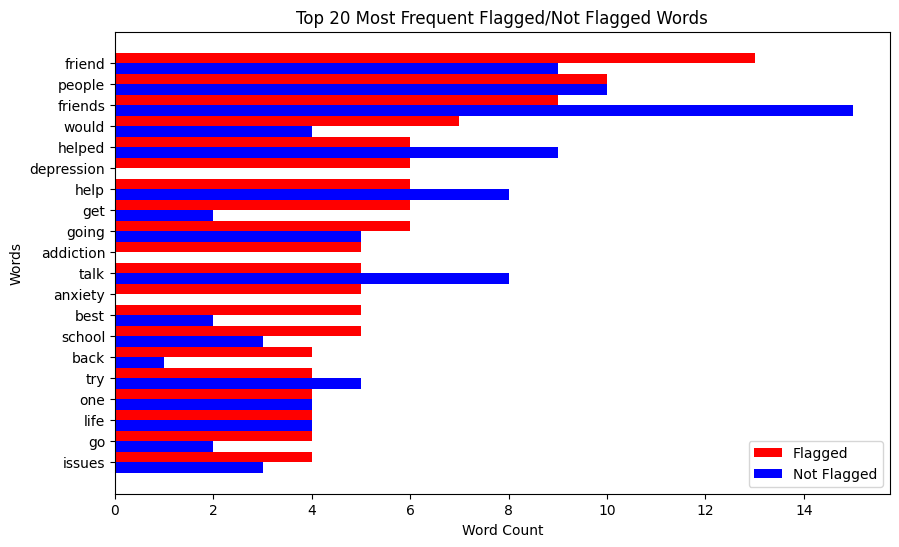

In [714]:
# Sort the DataFrame by frequency of flagged words in descending order and select the top 20
top_20_flagged = merged_df.sort_values(by='freq_f', ascending=False).head(20)

plt.figure(figsize=(10, 6))

y_pos = np.arange(len(top_20_flagged['words']))

bar_width = 0.5

plt.barh(y_pos - bar_width/2, top_20_flagged['freq_f'], height=bar_width, label='Flagged', color='r')
plt.barh(y_pos + bar_width/2, top_20_flagged['freq_n'], height=bar_width, label='Not Flagged', color='b')

plt.xlabel('Word Count')
plt.ylabel('Words')
plt.title('Top 20 Most Frequent Flagged/Not Flagged Words')
plt.yticks(y_pos, top_20_flagged['words'])
plt.legend()
plt.gca().invert_yaxis()
plt.show()

In [715]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_text'])

# Encode the target variable 'class'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['class'])

# Resample data using SMOTE for balancing
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

# Initialize classifiers with balanced class weights
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "Naive Bayes": MultinomialNB(),
    "Support Vector Machine": SVC(kernel='linear', random_state=42, class_weight='balanced')
}

# Train and evaluate each model
for model_name, model in models.items():
    # Train and evaluate model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{model_name} - Classification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_, zero_division=0))
    print(f"{model_name} - Accuracy Score:", accuracy_score(y_test, y_pred))



K-Nearest Neighbors - Classification Report:
              precision    recall  f1-score   support

     flagged       0.50      1.00      0.67        13
 not_flagged       1.00      0.13      0.24        15

    accuracy                           0.54        28
   macro avg       0.75      0.57      0.45        28
weighted avg       0.77      0.54      0.44        28

K-Nearest Neighbors - Accuracy Score: 0.5357142857142857

Random Forest - Classification Report:
              precision    recall  f1-score   support

     flagged       1.00      0.77      0.87        13
 not_flagged       0.83      1.00      0.91        15

    accuracy                           0.89        28
   macro avg       0.92      0.88      0.89        28
weighted avg       0.91      0.89      0.89        28

Random Forest - Accuracy Score: 0.8928571428571429

Naive Bayes - Classification Report:
              precision    recall  f1-score   support

     flagged       0.71      0.92      0.80        13
 not_

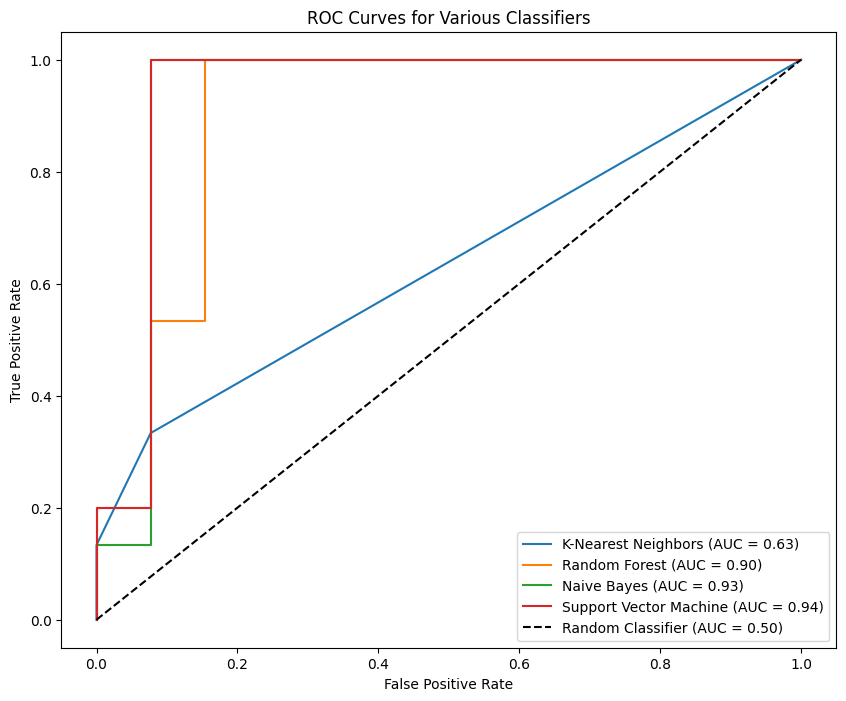

In [716]:
# Initialize models with balanced class weights
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "Naive Bayes": MultinomialNB(),
    "Support Vector Machine": SVC(kernel='linear', probability=True, random_state=42, class_weight='balanced')
}

# Binarize the target variable for ROC AUC
lb = LabelBinarizer()
y_binarized = lb.fit_transform(y)
# Resample data using SMOTE for balancing
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_binarized.ravel())
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

# Plot setup
plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict probabilities for ROC and AUC (for Naive Bayes and SVM with `probability=True`)
    y_probs = model.predict_proba(X_test)[:, 1]

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_probs)

    # Calculate AUC
    auc_score = roc_auc_score(y_test, y_probs)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_score:.2f})")

# Plot customization
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier (AUC = 0.50)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Various Classifiers")
plt.legend(loc="lower right")
plt.show()


# Deep learning

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.5466 - loss: 0.6860 - val_accuracy: 0.7059 - val_loss: 0.6834
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6357 - loss: 0.6733 - val_accuracy: 0.8235 - val_loss: 0.6768
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7519 - loss: 0.6684 - val_accuracy: 0.8235 - val_loss: 0.6718
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8139 - loss: 0.6529 - val_accuracy: 0.8824 - val_loss: 0.6657
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8489 - loss: 0.6422 - val_accuracy: 0.9412 - val_loss: 0.6577
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9380 - loss: 0.6308 - val_accuracy: 0.9412 - val_loss: 0.6492
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9574 - loss: 0.6118 - val_accuracy: 0.8824 - val_loss: 0.6396
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9224 - loss: 0.5974 - val_accuracy: 0.7647 - val_loss: 0.6291
Epoch 9/10


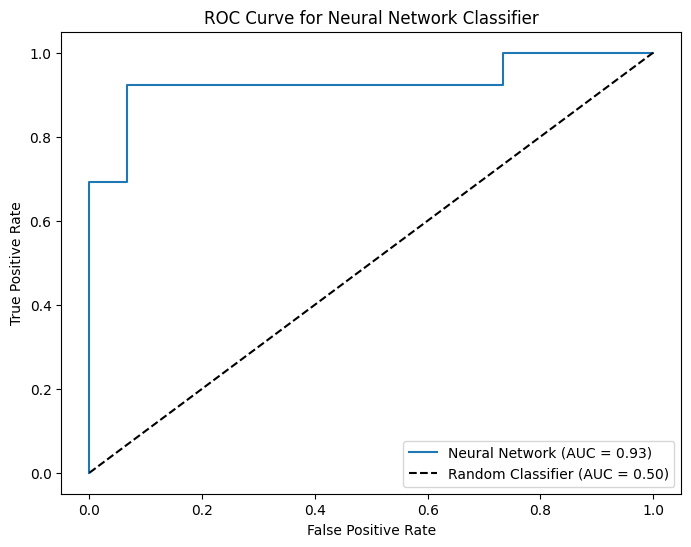

In [717]:
# Step 1: Vectorize text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_text']).toarray()

# Encode the target variable
y = np.where(df['class'] == 'flagged', 1, 0)  # Binary encoding (0 = not_flagged, 1 = flagged)

# Step 2: Balance the data with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

# Convert labels to categorical format for deep learning
y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)

# Step 4: Build the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')  # Two output neurons for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the model
history = model.fit(X_train, y_train_cat, epochs=10, batch_size=32, validation_split=0.2)

# Step 6: Evaluate the model
y_pred_probs = model.predict(X_test)[:, 1]  # Get probabilities for the "flagged" class
y_pred_classes = np.argmax(model.predict(X_test), axis=1)

# Calculate AUC
auc_score = roc_auc_score(y_test, y_pred_probs)
print(f"AUC Score: {auc_score:.2f}")

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

# Step 7: Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Neural Network (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier (AUC = 0.50)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Neural Network Classifier")
plt.legend(loc="lower right")
plt.show()


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning:

Argument `input_length` is deprecated. Just remove it.



3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 354ms/step - accuracy: 0.4262 - loss: 0.6947 - val_accuracy: 0.3529 - val_loss: 0.6958
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.5699 - loss: 0.6871 - val_accuracy: 0.3529 - val_loss: 0.6999
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 195ms/step - accuracy: 0.5350 - loss: 0.6886 - val_accuracy: 0.3529 - val_loss: 0.7022
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step - accuracy: 0.5115 - loss: 0.6838 - val_accuracy: 0.3529 - val_loss: 0.7002
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step - accuracy: 0.5273 - loss: 0.6800 - val_accuracy: 0.3529 - val_loss: 0.6977
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step - accuracy: 0.5036 - loss: 0.6798 - val_accuracy: 0.3529 - val_loss: 0.6973
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 197ms/step - accuracy: 0.6242 - loss: 0.6667 - val_accuracy: 0.3529 - val_loss: 0.6962
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 189ms/step - accuracy: 0.5738 - loss: 0.6584 - val_accuracy: 0.3529 - val_loss: 0.6902
Epo

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



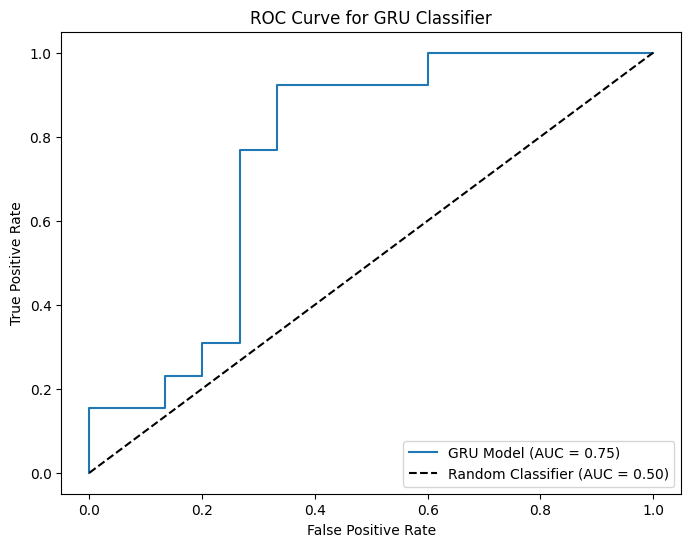

In [718]:

# Set parameters
max_vocab_size = 5000  # Adjust depending on dataset size
embedding_dim = 50     # Common choices: 50, 100, 200
max_sequence_length = 100  # Pad sequences to this length

# Step 1: Text tokenization and padding sequences
tokenizer = Tokenizer(num_words=max_vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(df['cleaned_text'])
sequences = tokenizer.texts_to_sequences(df['cleaned_text'])
X = pad_sequences(sequences, maxlen=max_sequence_length)

# Encode the target variable
y = np.where(df['class'] == 'flagged', 1, 0)  # Binary encoding (0 = not_flagged, 1 = flagged)

# Step 2: Balance the data with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

# Convert labels to categorical format for deep learning
y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)

# Step 4: Build the GRU model
model = Sequential([
    Embedding(input_dim=max_vocab_size, output_dim=embedding_dim, input_length=max_sequence_length),
    GRU(64, return_sequences=True),
    Dropout(0.3),
    GRU(32),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')  # Two output neurons for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the model
history = model.fit(X_train, y_train_cat, epochs=10, batch_size=32, validation_split=0.2)

# Step 6: Evaluate the model
y_pred_probs = model.predict(X_test)[:, 1]  # Get probabilities for the "flagged" class
y_pred_classes = np.argmax(model.predict(X_test), axis=1)

# Calculate AUC
auc_score = roc_auc_score(y_test, y_pred_probs)
print(f"AUC Score: {auc_score:.2f}")

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

# Step 7: Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"GRU Model (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier (AUC = 0.50)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for GRU Classifier")
plt.legend(loc="lower right")
plt.show()


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning:

Argument `input_length` is deprecated. Just remove it.



3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 309ms/step - accuracy: 0.4767 - loss: 0.6943 - val_accuracy: 0.3529 - val_loss: 0.6969
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.5234 - loss: 0.6885 - val_accuracy: 0.3529 - val_loss: 0.6968
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.5504 - loss: 0.6826 - val_accuracy: 0.4118 - val_loss: 0.6937
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.6550 - loss: 0.6817 - val_accuracy: 0.5294 - val_loss: 0.6906
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.6822 - loss: 0.6807 - val_accuracy: 0.5882 - val_loss: 0.6902
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.6355 - loss: 0.6825 - val_accuracy: 0.5882 - val_loss: 0.6901
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.6705 - loss: 0.6799 - val_accuracy: 0.4706 - val_loss: 0.6904
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.7210 - loss: 0.6753 - val_accuracy: 0.4118 - val_loss: 0.6933
Epoch 9/

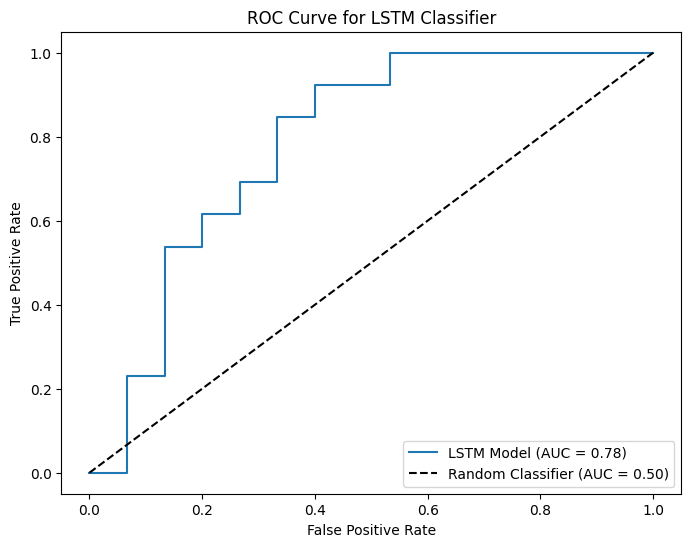

In [719]:
# Set parameters
max_vocab_size = 5000  # Adjust depending on dataset size
embedding_dim = 50     # Common choices: 50, 100, 200
max_sequence_length = 100  # Pad sequences to this length

# Step 1: Text tokenization and padding sequences
tokenizer = Tokenizer(num_words=max_vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(df['cleaned_text'])
sequences = tokenizer.texts_to_sequences(df['cleaned_text'])
X = pad_sequences(sequences, maxlen=max_sequence_length)

# Encode the target variable
y = np.where(df['class'] == 'flagged', 1, 0)  # Binary encoding (0 = not_flagged, 1 = flagged)

# Step 2: Balance the data with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

# Convert labels to categorical format for deep learning
y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)

# Step 4: Build the LSTM model
model = Sequential([
    Embedding(input_dim=max_vocab_size, output_dim=embedding_dim, input_length=max_sequence_length),
    LSTM(64, return_sequences=True),
    Dropout(0.3),
    LSTM(32),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')  # Two output neurons for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the model
history = model.fit(X_train, y_train_cat, epochs=10, batch_size=32, validation_split=0.2)

# Step 6: Evaluate the model
y_pred_probs = model.predict(X_test)[:, 1]  # Get probabilities for the "flagged" class
y_pred_classes = np.argmax(model.predict(X_test), axis=1)

# Calculate AUC
auc_score = roc_auc_score(y_test, y_pred_probs)
print(f"AUC Score: {auc_score:.2f}")

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

# Step 7: Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"LSTM Model (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier (AUC = 0.50)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for LSTM Classifier")
plt.legend(loc="lower right")
plt.show()
